# Klasyfikacja danych przy użyciu algorytmów uczenia maszynowego (różne zbiory danych)

In [1]:
# Wczytanie zbioru danych
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


In [2]:
# Wczytanie zbioru MNIST
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
# Przygotowanie danych
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Normalizacja danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Trenowanie klasyfikatorow
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

svm = SVC(kernel='linear', C=0.5)
svm.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
# Predykcja i ocena wynikow
print("Logistic Regresion")
print("-" *100)
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

print("SVM")
print("-"*100)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

print("kNN")
print("-"*100)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))


Logistic Regresion
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.93      0.95      0.94        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

SVM
----------------------------------------------------------------------------------------------------
              pr

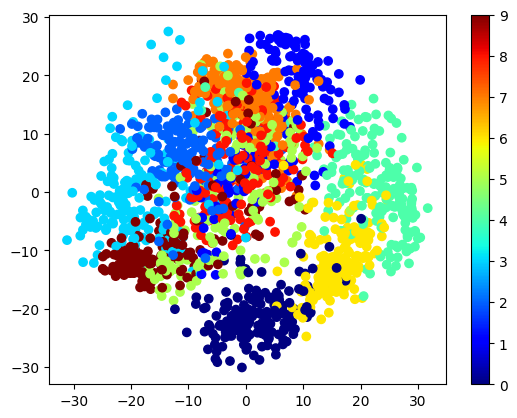

np.float64(0.28509364823699285)

In [ ]:
# Redukcja wymiarowosci
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pca.explained_variance_ratio_.sum()


In [ ]:
X_pcaTrain, X_pcaTest, y_ptrain, y_ptest = train_test_split(X_pca, y, test_size=0.2)

# Trenowanie klasyfikatorow
log_reg = LogisticRegression()
log_reg.fit(X_pcaTrain, y_ptrain)

svm = SVC(kernel='linear')
svm.fit(X_pcaTrain, y_ptrain)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_pcaTrain, y_ptrain)

pl = log_reg.predict(X_pcaTest)
print(classification_report(y_ptest, pl))

ps = svm.predict(X_pcaTest)
print(classification_report(y_ptest, ps))

pk = knn.predict(X_pcaTest)
print(classification_report(y_ptest, pk))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.36      0.42      0.39        38
           2       0.53      0.63      0.58        30
           3       0.83      0.69      0.75        42
           4       0.82      0.87      0.85        38
           5       0.19      0.23      0.21        31
           6       0.80      0.82      0.81        34
           7       0.57      0.65      0.61        43
           8       0.47      0.19      0.27        43
           9       0.44      0.52      0.48        31

    accuracy                           0.59       360
   macro avg       0.60      0.60      0.59       360
weighted avg       0.60      0.59      0.59       360

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        30
           1       0.42      0.42      0.42        38
           2       0.61      0.63      0.62        30
           3       0.87 

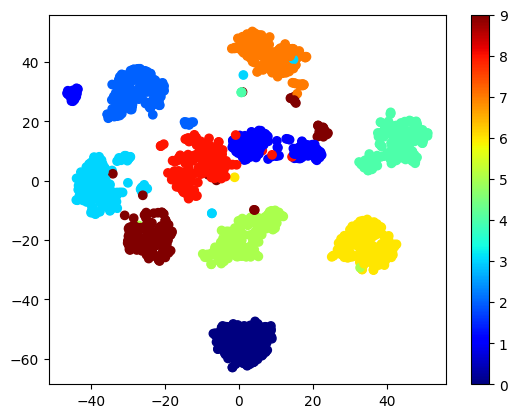

In [ ]:
# Wizualizacja wynikow t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='jet')
plt.colorbar()
plt.show()